1. Data Preprocessing and Exploratory Analysis:
• Load the dataset ("Dataset.csv") and verify its integrity.
• Confirm that there are no missing values.
• Identify and analyze outliers using visualizations such as boxplots.
• Visualize feature distributions with histograms and KDE plots to understand the
overall distribution of each feature.
• Review feature statistics (e.g., mean, standard deviation) to get insights into the
data.
• Normalize or standardize the dataset so that all features contribute equally in
distance calculations, which is crucial for clustering.

2. Impact of the Number of Clusters on KMeans Clustering with Euclidean Distance
• Apply KMeans clustering (using Euclidean distance) on the standardized dataset.
• For a range of cluster numbers (e.g., from 1 to 10), compute the inertia (SSE) and plot
these values to identify the “elbow” point.

Loaded DataFrame shape: (900, 8)
Missing values per column:
 Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
label              0
dtype: int64 

Summary statistics:
                 Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count     900.000000       900.000000       900.000000    900.000000   
mean    87804.127778       430.929950       254.488133      0.781542   
std     39002.111390       116.035121        49.988902      0.090318   
min     25387.000000       225.629541       143.710872      0.348730   
25%     59348.000000       345.442898       219.111126      0.741766   
50%     78902.000000       407.803951       247.848409      0.798846   
75%    105028.250000       494.187014       279.888575      0.842571   
max    235047.000000       997.291941       492.275279      0.962124   

          ConvexArea      Extent    Perimeter  
count     900.000000  900.000000   900

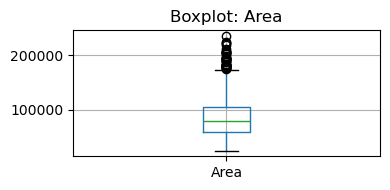

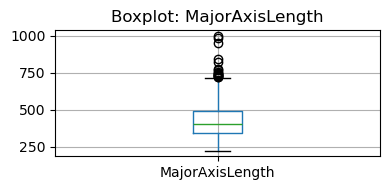

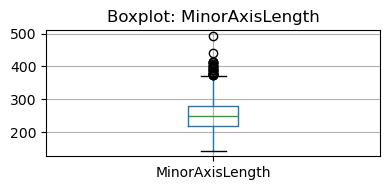

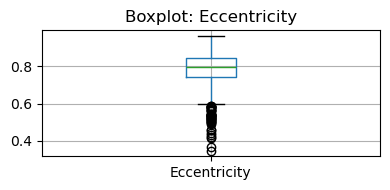

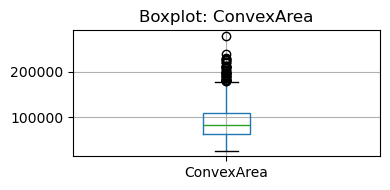

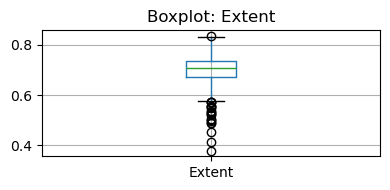

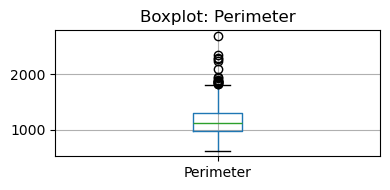

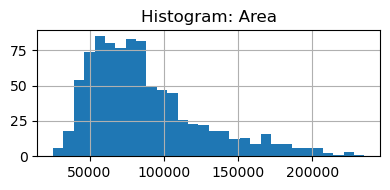

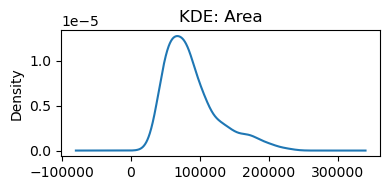

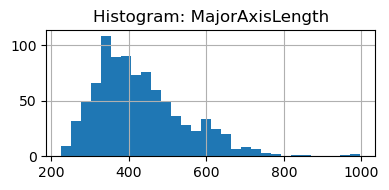

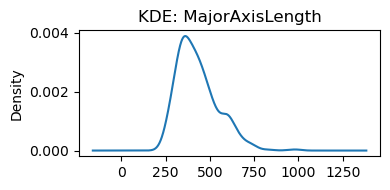

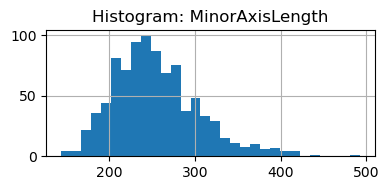

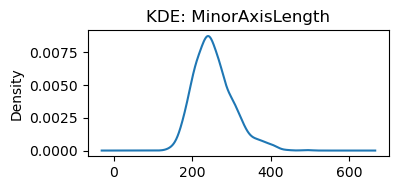

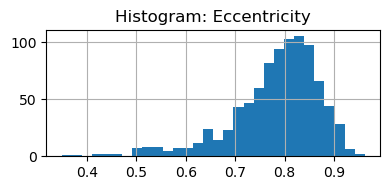

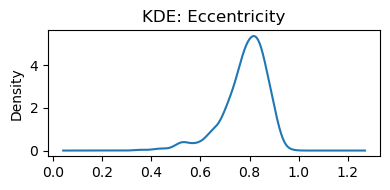

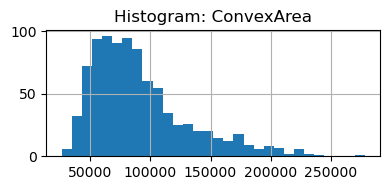

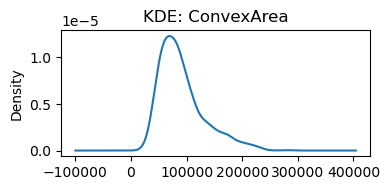

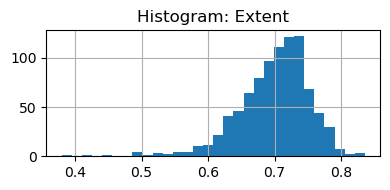

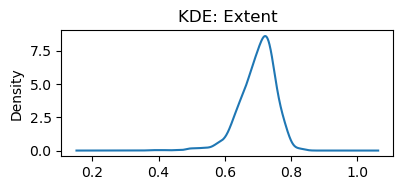

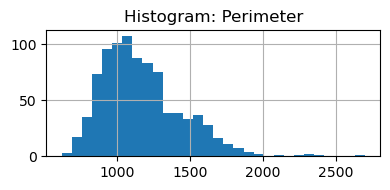

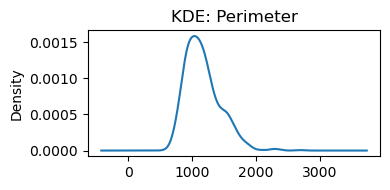

First 5 rows after standardization:
        Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0 -0.007186         0.097577        -0.023958      0.423142   -0.015709   
1 -0.324217        -0.209012        -0.229292      0.224476   -0.304248   
2  0.078292         0.097758         0.236988      0.186239    0.062113   
3 -1.074286        -1.245051        -0.915273     -1.069623   -1.076165   
4 -0.215393        -0.678958         0.727354     -2.409827   -0.238623   

     Extent  Perimeter    label  
0  1.106743   0.066274  Kecimen  
1 -0.287777  -0.161252  Kecimen  
2 -1.158250   0.155945  Kecimen  
3  0.001711  -1.175915  Kecimen  
4  1.745259  -0.338639  Kecimen  


In [43]:
# Question 1: Data Preprocessing & Exploratory Analysis
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset via its absolute path:
csv_path = "/Users/shadankhan/Machine Learning 4.1/Dataset.csv"
df = pd.read_csv(csv_path)
print("Loaded DataFrame shape:", df.shape)

# 2. Confirm no missing values
print("Missing values per column:\n", df.isnull().sum(), "\n")

# 3. Summary statistics
print("Summary statistics:\n", df.describe(), "\n")

# 4. Identify numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric columns:", numeric_cols, "\n")

# 5. Outlier detection via boxplot
for col in numeric_cols:
    plt.figure(figsize=(4,2))
    df.boxplot(column=col)
    plt.title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()

# 6. Distribution plots: histogram + KDE
for col in numeric_cols:
    plt.figure(figsize=(4,2))
    df[col].hist(bins=30)
    plt.title(f"Histogram: {col}")
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(4,2))
    df[col].plot.kde()
    plt.title(f"KDE: {col}")
    plt.tight_layout()
    plt.show()

# 7. Standardize numeric features
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("First 5 rows after standardization:\n", df.head())


/Users/shadankhan/Machine Learning 4.1
(900, 8)
 k     inertia
 1 6300.000000
 2 3397.844579
 3 2591.651073
 4 2168.413713
 5 1895.928921
 6 1684.055351
 7 1496.558479
 8 1354.202303
 9 1250.893248
10 1148.240659


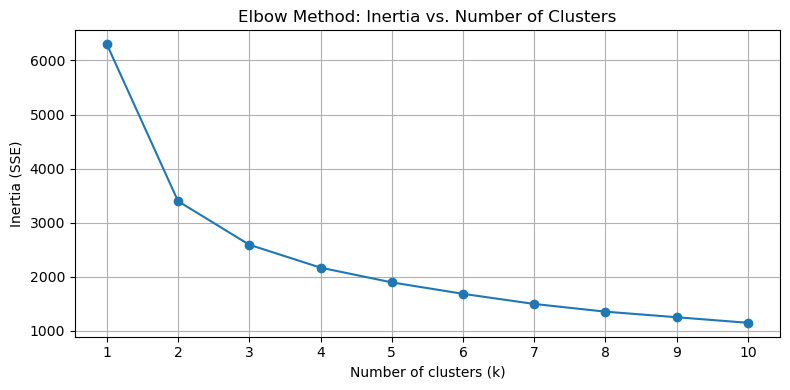

In [45]:
# In a notebook cell, not in the macOS shell!
%cd ~/Machine\ Learning\ 4.1

import pandas as pd
df = pd.read_csv("Dataset.csv")
print(df.shape)



import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Load the dataset (assumes you’re already in the folder containing Dataset.csv)
df = pd.read_csv("Dataset.csv")

# 2. Identify numeric features and standardize them
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
X = scaler.fit_transform(df[numeric_cols])  # numpy array of shape (n_samples, n_features)

# 3. Compute KMeans inertia (SSE) for k = 1 to 10
inertias = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertias.append(km.inertia_)

# 4. (Optional) Display the inertia values as a table
inertia_df = pd.DataFrame({
    'k': list(k_range),
    'inertia': inertias
})
print(inertia_df.to_string(index=False))

# 5. Plot the “elbow” curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method: Inertia vs. Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()


3. Evaluating the Stability of KMeans and KMeans++ Initialization
• Run KMeans clustering 50 times using two initialization methods:
a) Standard random initialization.
b) KMeans++ initialization.
• Compute and compare the average inertia (SSE) and the Silhouette Score for each
method over these iterations.

In [48]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# 0. Load & standardize (repeat from Q1 to ensure X is ready)
df = pd.read_csv("/Users/shadankhan/Machine Learning 4.1/Dataset.csv")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
X = scaler.fit_transform(df[numeric_cols])

# 1. Set parameters
n_runs = 50
k = 3  # number of clusters from elbow method
methods = ['random', 'k-means++']

# 2. Prepare containers
results = {
    method: {'inertia': [], 'silhouette': []}
    for method in methods
}

# 3. Run KMeans repeatedly for each init method
for method in methods:
    for run in range(n_runs):
        km = KMeans(
            n_clusters=k,
            init=method,
            n_init=1,              # one initialization per run
            random_state=run       # seed for reproducibility
        )
        labels = km.fit_predict(X)
        # record inertia
        results[method]['inertia'].append(km.inertia_)
        # record silhouette score
        score = silhouette_score(X, labels)
        results[method]['silhouette'].append(score)

# 4. Aggregate results
summary = []
for method in methods:
    avg_inertia   = np.mean(results[method]['inertia'])
    std_inertia   = np.std(results[method]['inertia'])
    avg_sil       = np.mean(results[method]['silhouette'])
    std_sil       = np.std(results[method]['silhouette'])
    summary.append({
        'init_method': method,
        'avg_inertia': avg_inertia,
        'std_inertia': std_inertia,
        'avg_silhouette': avg_sil,
        'std_silhouette': std_sil
    })

summary_df = pd.DataFrame(summary).set_index('init_method')
print(summary_df)


             avg_inertia  std_inertia  avg_silhouette  std_silhouette
init_method                                                          
random       2598.291473    41.951090        0.304053        0.008168
k-means++    2592.152039     0.446241        0.305976        0.002742


4. Clustering Evaluation Using Purity and Mutual Information
• Use KMeans (with the optimal k from Question 2) to cluster the data. Assume the
dataset contains a ground-truth label column (e.g., "label"). For each cluster, assign a
label based on the majority class.
• Evaluation Metrics: Compute and report the following:
a) Purity Score: Measures how homogeneous each cluster is relative to the true
labels.
b) Mutual Information Score: Quantifies the mutual dependence between the
clustering results and the true labels.
c) Silhouette Score: Evaluates the clustering quality without reference to the
ground truth by comparing intra-cluster cohesion versus inter-cluster
separation.

In [50]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.preprocessing import StandardScaler
from collections import Counter

# 1. Load the dataset (absolute path to avoid any working-dir issues)
csv_path = "/Users/shadankhan/Machine Learning 4.1/Dataset.csv"
df = pd.read_csv(csv_path)

# 2. Separate features and true labels
true_labels = df['label'].values
feature_cols = [c for c in df.columns if c != 'label']
X_raw = df[feature_cols].select_dtypes(include=['int64','float64']).values

# 3. Standardize numeric features
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

# 4. Run KMeans with optimal k from Q2 (e.g. k=3)
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
pred_clusters = kmeans.fit_predict(X)

# 5. Assign each cluster the majority true label
cluster_to_label = {}
for cluster_id in range(k):
    members = true_labels[pred_clusters == cluster_id]
    if len(members) == 0:
        cluster_to_label[cluster_id] = None
    else:
        cluster_to_label[cluster_id] = Counter(members).most_common(1)[0][0]

# Build an array of assigned labels
assigned_labels = np.array([cluster_to_label[c] for c in pred_clusters])

# 6a. Compute Purity: fraction of points whose assigned label equals true label
purity = np.mean(assigned_labels == true_labels)

# 6b. Compute Mutual Information Score
mi_score = mutual_info_score(true_labels, pred_clusters)

# 6c. Compute Silhouette Score (intrinsic evaluation)
sil_score = silhouette_score(X, pred_clusters)

# 7. Report results
print(f"Purity Score:           {purity:.4f}")
print(f"Mutual Information:     {mi_score:.4f}")
print(f"Silhouette Score:       {sil_score:.4f}")


Purity Score:           0.8478
Mutual Information:     0.2963
Silhouette Score:       0.3092


5. Principal Component Analysis (PCA) for Dimensionality Reduction
• Apply PCA to reduce the dataset to 4 principal components.
• Plot the cumulative variance explained by the principal components and determine
how many components are needed to retain 90% of the total variance.
• Create a 3D scatter plot of the first three principal components.

 PC  Explained Variance Ratio  Cumulative Variance
PC1                  0.690327             0.690327
PC2                  0.207598             0.897925
PC3                  0.089778             0.987704
PC4                  0.008118             0.995822

Number of components to retain ≥90% variance: 3


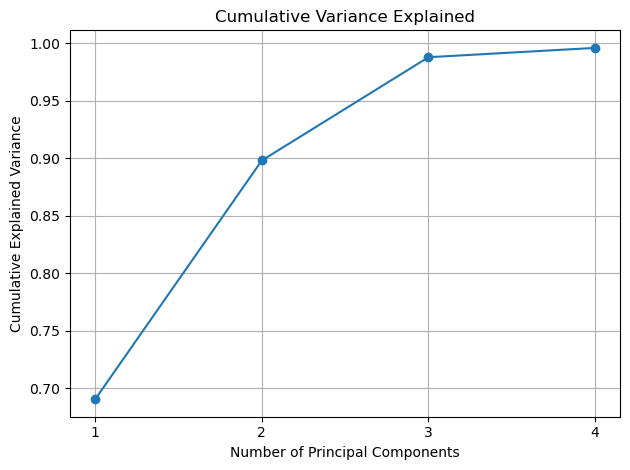

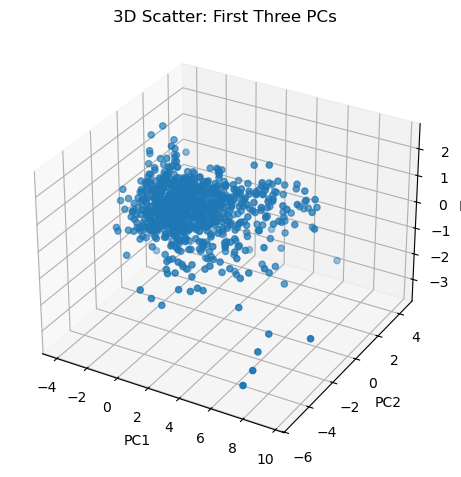

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# 1. Load & standardize
csv_path = "/Users/shadankhan/Machine Learning 4.1/Dataset.csv"
df = pd.read_csv(csv_path)
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
X = StandardScaler().fit_transform(df[numeric_cols])

# 2. PCA → 4 components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

# 3. Explained‐variance table
explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)
pc_names = [f"PC{i+1}" for i in range(4)]
variance_df = pd.DataFrame({
    'PC': pc_names,
    'Explained Variance Ratio': explained,
    'Cumulative Variance': cumulative
})
print(variance_df.to_string(index=False))

# 4. How many to reach 90%?
n_90 = np.argmax(cumulative >= 0.90) + 1
print(f"\nNumber of components to retain ≥90% variance: {n_90}")

# 5. Plot cumulative variance
plt.figure()
plt.plot(range(1,5), cumulative, marker='o')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1,5))
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. 3D scatter of first three PCs
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], s=20)
ax.set_title('3D Scatter: First Three PCs')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.tight_layout()
plt.show()


6. (Only for SIT720) Density-Based Clustering Using DBSCAN with Different Distance
Metrics
Problem Solving Task
• Apply DBSCAN to the dataset twice:
a) Once using Euclidean distance.
b) Once using Mahalanobis distance.
• Determine the optimal values for eps (ε) and min_samples for each distance metric.
• Compare the clustering results from both distance metrics.

,metric,eps,min_samples,n_clusters,silhouette
0,euclidean,0.3,3,52,-0.339812
1,euclidean,0.3,5,22,-0.398378
2,euclidean,0.3,10,0,NaN
3,euclidean,0.5,3,16,-0.069598
4,euclidean,0.5,5,6,0.002716
5,euclidean,0.5,10,2,0.031854
6,euclidean,0.7,3,6,0.055049
7,euclidean,0.7,5,2,0.190544
8,euclidean,0.7,10,2,0.259249
9,euclidean,1.0,3,2,0.326588


Best Euclidean DBSCAN: {'metric': 'euclidean', 'eps': 1.0, 'min_samples': 3, 'n_clusters': 2, 'silhouette': 0.3265875212642986}
Best Mahalanobis DBSCAN: {'metric': 'mahalanobis', 'eps': 1.0, 'min_samples': 5, 'n_clusters': 3, 'silhouette': 0.12921793696709089}

Cluster counts (Euclidean): Counter({0: 876, -1: 21, 1: 3})
Cluster counts (Mahalanobis): Counter({0: 693, -1: 192, 2: 10, 1: 5})


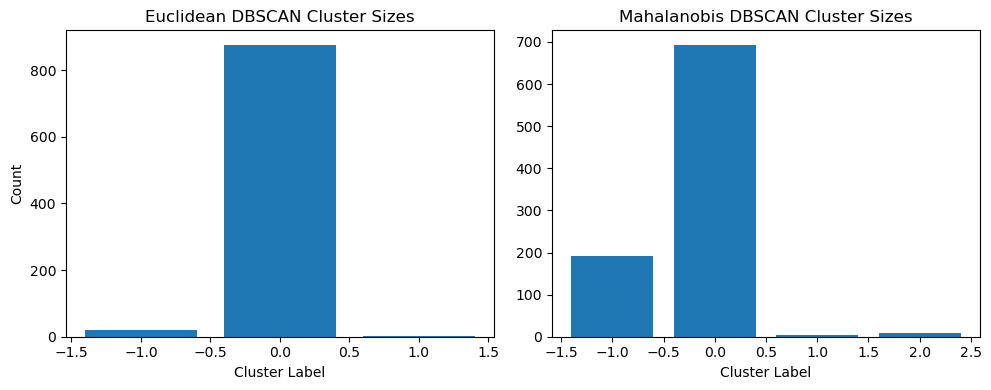

In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.covariance import EmpiricalCovariance
import matplotlib.pyplot as plt
from collections import Counter

# 1. Load & standardize
df = pd.read_csv("/Users/shadankhan/Machine Learning 4.1/Dataset.csv")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X = StandardScaler().fit_transform(df[numeric_cols])

# 2. Prepare Mahalanobis inverse covariance
cov = EmpiricalCovariance().fit(X)
VI = np.linalg.inv(cov.covariance_)

# 3. Grid search over eps/min_samples
eps_vals = [0.3, 0.5, 0.7, 1.0]
min_samples_vals = [3, 5, 10]

records = []
for metric in ['euclidean', 'mahalanobis']:
    for eps in eps_vals:
        for ms in min_samples_vals:
            params = {'eps': eps, 'min_samples': ms, 'metric': metric}
            if metric == 'mahalanobis':
                params['metric_params'] = {'VI': VI}
            db = DBSCAN(**params)
            labels = db.fit_predict(X)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            sil = silhouette_score(X, labels) if n_clusters > 1 else np.nan
            records.append({
                'metric': metric,
                'eps': eps,
                'min_samples': ms,
                'n_clusters': n_clusters,
                'silhouette': sil
            })

results_df = pd.DataFrame(records)
display(results_df)

# 4. Select best settings by max silhouette
best_euclid = results_df[results_df.metric=='euclidean'].nlargest(1, 'silhouette').iloc[0]
best_mah    = results_df[results_df.metric=='mahalanobis'].nlargest(1, 'silhouette').iloc[0]

print("Best Euclidean DBSCAN:", best_euclid.to_dict())
print("Best Mahalanobis DBSCAN:", best_mah.to_dict())

# 5. Rerun with optimal params and print cluster counts
db_e = DBSCAN(eps=best_euclid.eps, min_samples=int(best_euclid.min_samples), metric='euclidean').fit(X)
db_m = DBSCAN(eps=best_mah.eps,   min_samples=int(best_mah.min_samples),   metric='mahalanobis', metric_params={'VI':VI}).fit(X)

counts_e = Counter(db_e.labels_)
counts_m = Counter(db_m.labels_)

print("\nCluster counts (Euclidean):", counts_e)
print("Cluster counts (Mahalanobis):", counts_m)

# 6. Plot bar charts of cluster sizes
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.bar(counts_e.keys(), counts_e.values())
plt.title("Euclidean DBSCAN Cluster Sizes")
plt.xlabel("Cluster Label")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.bar(counts_m.keys(), counts_m.values())
plt.title("Mahalanobis DBSCAN Cluster Sizes")
plt.xlabel("Cluster Label")

plt.tight_layout()
plt.show()


7. Clustering Performance on PCA-Reduced vs. Full Dataset
• Apply KMeans clustering to:
a) The original standardized dataset.
b) The PCA-transformed dataset (using the principal components from Question
5).
• Evaluate the clustering quality using the Silhouette Score.
• Compare whether the PCA-transformed dataset results in better-separated and
more compact clusters relative to the full dataset. 

Silhouette Score (Full data):     0.3092
Silhouette Score (PCA reduced):   0.3102


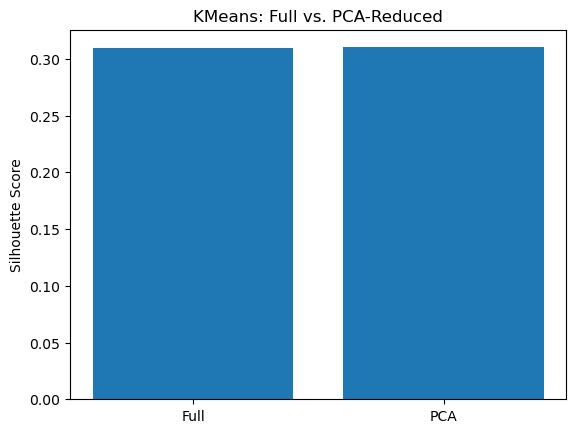

In [58]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Load the data (adjust the path as needed)
csv_path = Path.home() / "Machine Learning 4.1" / "Dataset.csv"
df = pd.read_csv(csv_path)

# 2. Extract and standardize numeric features
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
scaler = StandardScaler()
X_full = scaler.fit_transform(df[numeric_cols])

# 3. PCA transform to 4 components (from Q5)
pca = PCA(n_components=4, random_state=42)
X_pca  = pca.fit_transform(X_full)

# 4. Choose k from your elbow analysis
k = 3

# 5a. KMeans on full dataset
km_full = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
labels_full = km_full.fit_predict(X_full)
sil_full = silhouette_score(X_full, labels_full)

# 5b. KMeans on PCA‐reduced dataset
km_pca = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
labels_pca = km_pca.fit_predict(X_pca)
sil_pca = silhouette_score(X_pca, labels_pca)

# 6. Report Silhouette Scores
print(f"Silhouette Score (Full data):     {sil_full:.4f}")
print(f"Silhouette Score (PCA reduced):   {sil_pca:.4f}")

# 7. (Optional) Visual comparison
import matplotlib.pyplot as plt

plt.bar(['Full','PCA'], [sil_full, sil_pca])
plt.ylabel('Silhouette Score')
plt.title('KMeans: Full vs. PCA-Reduced')
plt.show()


8. (Only for SIT720) Clustering Using t-SNE
• Apply t-SNE (using the exact method) to reduce the dataset to 4 components.
• Create a 3D scatter plot of the first three t-SNE components.
• Apply KMeans clustering on the t‑SNE–reduced data using an appropriate number of
clusters (e.g., based on prior optimal k or an elbow method on the t‑SNE output).
• Evaluate the clustering performance on the t‑SNE–reduced data using metrics such
as the Silhouette Score and compare these results to clustering on the original and
PCA–transformed dataset.
• Discuss whether the clusters formed on the t-SNE–reduced data are more distinct
and how well they correspond to the known data structure. 

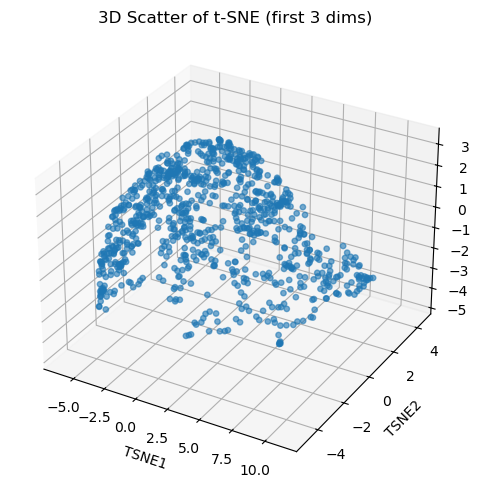

Silhouette (full data):  0.3092
Silhouette (PCA data):   0.3102
Silhouette (t-SNE data): 0.3178


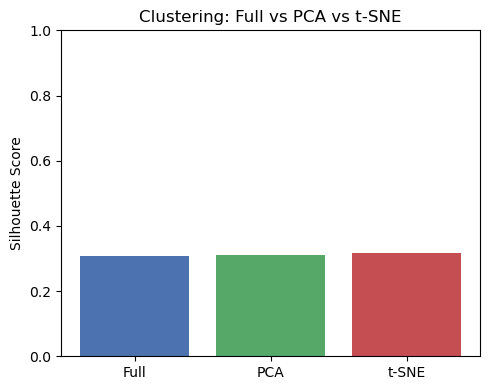

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# 1. Load & standardize
csv_path = Path.home() / "Machine Learning 4.1" / "Dataset.csv"
df = pd.read_csv(csv_path)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X_full = StandardScaler().fit_transform(df[numeric_cols])

# 2. PCA-reduced (4 components)
pca = PCA(n_components=4, random_state=42)
X_pca = pca.fit_transform(X_full)

# 3. t-SNE reduced (4 components) using exact method
tsne = TSNE(
    n_components=4,
    method='exact',       # exact algorithm allows >3 output dims
    init='pca',
    learning_rate='auto',
    random_state=42
)
X_tsne = tsne.fit_transform(X_full)

# 4. 3D scatter of first three t-SNE components
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:,0], X_tsne[:,1], X_tsne[:,2], s=15, alpha=0.6)
ax.set_title("3D Scatter of t-SNE (first 3 dims)")
ax.set_xlabel("TSNE1"); ax.set_ylabel("TSNE2"); ax.set_zlabel("TSNE3")
plt.tight_layout()
plt.show()

# 5. KMeans clustering on each representation
k = 3  # from elbow analysis
km = lambda X: KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42).fit_predict(X)

labels_full = km(X_full)
labels_pca  = km(X_pca)
labels_tsne = km(X_tsne)

# 6. Compute silhouette scores
sil_full = silhouette_score(X_full,  labels_full)
sil_pca  = silhouette_score(X_pca,   labels_pca)
sil_tsne = silhouette_score(X_tsne,  labels_tsne)

print(f"Silhouette (full data):  {sil_full:.4f}")
print(f"Silhouette (PCA data):   {sil_pca:.4f}")
print(f"Silhouette (t-SNE data): {sil_tsne:.4f}")

# 7. Bar chart comparison
plt.figure(figsize=(5,4))
plt.bar(['Full','PCA','t-SNE'], [sil_full, sil_pca, sil_tsne], color=['#4C72B0','#55A868','#C44E52'])
plt.ylabel("Silhouette Score")
plt.title("Clustering: Full vs PCA vs t-SNE")
plt.ylim(0,1)
plt.tight_layout()
plt.show()
